<a href="https://colab.research.google.com/github/tubleronchik/SPO/blob/master/System_OS_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Парсер

In [0]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [149]:
url_district = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217436&type=222"
def parser(url):
  response = requests.get(url)
  page = BeautifulSoup(response.content, "lxml")
  UIK = pd.read_html(url, encoding='cp1251', header = 0)[7]
  UIK.drop([11], inplace = True)
  for i in range(UIK.shape[1]): #от 0 до размерности массива (берем столбцы)
    UIK.iloc[2,i] = int(UIK.iloc[2,i]) + int(UIK.iloc[3,i])
    for j in range(3):
      UIK.iloc[(11+j), i] = (UIK.iloc[(11+j), i]).split()[1]
  UIK.drop([3], inplace = True)
  UIK
  return(UIK)
    
UIK = parser(url_district)  
UIK


,УИК №1612,УИК №1613,УИК №1614,УИК №1615,УИК №1616,УИК №1617,УИК №1618,УИК №1619,УИК №1620,УИК №1621,УИК №1622,УИК №1623,УИК №1624,УИК №1625,УИК №1626,УИК №1627,УИК №1628,УИК №1629,УИК №1630,УИК №1631,УИК №1632,УИК №1633,УИК №1634,УИК №1635,УИК №1636,УИК №1637,УИК №1638,УИК №1639,УИК №1640,УИК №1641,УИК №1642,УИК №1643,УИК №1644,УИК №1645,УИК №1646,УИК №1647,УИК №1648,УИК №1649,УИК №1650,УИК №1651,УИК №1652,УИК №1653,УИК №1654,УИК №1655,УИК №1656,УИК №1657,УИК №1658,УИК №1659,УИК №1660,УИК №1661,УИК №1662,УИК №1663,УИК №1664,УИК №1665,УИК №1667
0,1438,1196,1716,1771,1770,1462,1375,1899,2171,1853,2240,1318,1843,1755,977,1559,2187,1185,1403,2097,1926,1678,1139,1441,1733,2739,2198,1086,1694,1876,961,2171,1674,1372,1787,2535,1185,1393,1463,1679,1154,2539,2426,1518,2507,2474,2460,2449,2167,2166,2347,1046,1925,183,128
1,1000,900,1200,1200,1300,1100,1150,1200,1500,1300,1600,1000,1300,1300,700,1100,1600,900,1000,1500,1300,1200,700,1000,1350,1700,1500,850,1000,1300,850,1500,1200,1000,1300,1800,1000,1000,1100,1600,800,1700,1700,1250,1800,1800,1700,1600,1500,1500,1700,800,1300,183,126
2,783,501,568,630,962,694,1011,612,918,903,959,716,766,741,560,856,1116,402,719,701,982,661,607,559,1196,1001,1147,661,996,1199,716,1002,1133,356,1075,1739,800,924,848,923,298,1694,1464,1147,1512,1147,906,1247,1204,1177,1251,634,1030,183,126
4,217,399,632,570,338,406,139,588,582,397,641,284,534,559,140,244,484,498,281,799,318,539,93,441,154,699,353,189,4,101,134,498,67,644,225,61,200,76,252,677,502,6,236,103,288,653,794,353,296,323,449,166,270,0,0
5,7,2,12,25,53,7,6,9,59,31,9,0,39,43,8,15,5,2,3,0,3,2,3,6,5,23,6,4,7,4,1,10,12,3,5,22,5,1,6,8,11,55,84,3,9,14,50,238,78,45,12,4,60,61,119
6,701,499,509,599,878,673,1005,602,859,872,941,701,717,687,552,841,1111,336,642,620,974,648,601,536,1159,941,1141,646,989,1195,715,969,1121,353,1069,1717,795,806,842,913,287,1639,1380,1144,1503,1109,856,999,1121,1127,1239,622,970,122,7
7,22,16,14,19,11,3,25,22,28,19,22,3,12,33,8,20,8,23,13,13,20,19,5,8,19,30,22,9,16,27,7,26,23,35,17,27,8,19,66,27,8,27,2,48,3,71,22,24,0,44,30,13,15,4,1
8,686,485,507,605,920,677,986,589,890,884,928,698,744,697,552,836,1108,315,632,607,957,631,599,534,1145,934,1125,641,980,1172,709,953,1110,321,1057,1712,792,788,782,894,290,1667,1462,1099,1509,1052,884,1213,1199,1128,1221,613,1015,179,125
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


2я строка - явка

In [145]:
names = pd.read_html(url_district, encoding='cp1251')[6]
names.drop([0], axis = 1, inplace = True)
names.drop([12], inplace = True)
names.iloc[3,1] = int(names.iloc[3,1]) + int(names.iloc[4,1])
names.drop([4], inplace = True)
print(names)

                                                    1             2
0                                                 NaN         Сумма
1   Число избирателей, внесенных в список избирате...         94434
2   Число избирательных бюллетеней, полученных уча...         67559
3   Число избирательных бюллетеней, выданных избир...         48663
5           Число погашенных избирательных бюллетеней         18896
6   Число избирательных бюллетеней, содержащихся в...          1314
7   Число избирательных бюллетеней, содержащихся в...         46600
8     Число недействительных избирательных бюллетеней          1076
9       Число действительных избирательных бюллетеней         46838
10          Число утраченных избирательных бюллетеней             0
11  Число избирательных бюллетеней, не учтенных пр...             0
13                             Амосов Михаил Иванович   5753 12.01%
14                        Беглов Александр Дмитриевич  36632 76.45%
15                       Тихонова Надежда Геннад

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Процент явки:

In [0]:
procent_appearence = []
for i in range(UIK.shape[1]):
  procent = int(UIK.iloc[2, i])/(int(UIK.iloc[0,i]))
  procent_appearence.append(procent*100)

#for proc in procent_appearence:
 # print(proc)

In [160]:
procent_Amosov = []
procent_Beglov = []
procent_Tikhonova = []
appearence = []
for i in range(UIK.shape[1]):
  procent_Amosov.append(float(UIK.iloc[10, i].split("%")[0]))
  procent_Beglov.append(float(UIK.iloc[11, i].split("%")[0]))
  procent_Tikhonova.append(float(UIK.iloc[12, i].split("%")[0]))
  appearence.append(int(UIK.iloc[0,i]))
print(len(procent_Beglov))


55


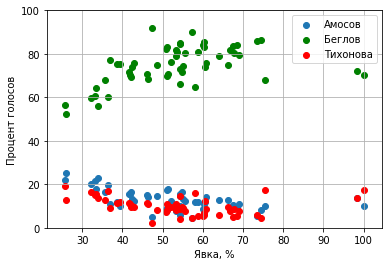

In [153]:
plt.scatter(procent_appearence, procent_Amosov, label = u'Амосов')
plt.scatter(procent_appearence, procent_Beglov, label = u'Беглов', color = 'g')
plt.scatter(procent_appearence, procent_Tikhonova, label = u'Тихонова', color = 'r')
plt.xlabel(u'Явка, %')
plt.ylabel(u'Процент голосов')
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.show()

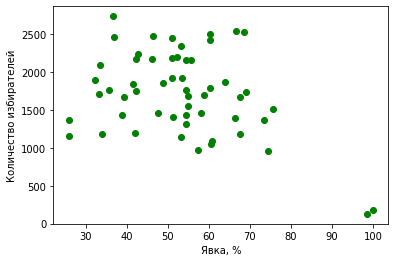

In [154]:
plt.scatter(procent_appearence,appearence, color = 'g')
plt.ylabel(u'Количество избирателей')
plt.xlabel(u'Явка, %')
plt.show()

In [0]:
count_UIK = np.array([])
for count in range(101):
  count_UIK = np.append(count_UIK, 0)
for j in procent_appearence:
  for i in range(101):
    if int(j) == i:
      count_UIK[i]+=1 

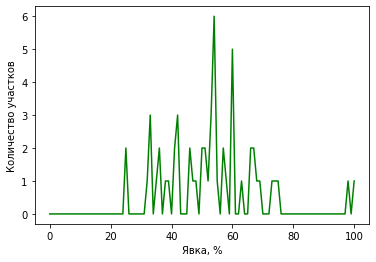

In [156]:
x = np.arange(101)
plt.plot(x, count_UIK, color = 'g')
plt.ylabel(u'Количество участков')
plt.xlabel(u'Явка, %')
plt.show()

In [0]:
response = open('УИК.kml')
html = response.read()
names = []
longitude = [] # долгота уик-ов
latitude = [] # широта всех уик-ов

soup = BeautifulSoup(html, "lxml")
# парсер номеров уик-ов
name = soup.find_all('name')
for i in name:
  names.append(i.text)
del names[0]
# парсер координат уик-ов
cord = soup.find_all('coordinates')
for j in cord:
  longitude.append(float(((j.text).split(",")[0]).strip()))
  latitude.append(float((j.text).split(",")[1]))
  
my_longitude = [] # долгота моих уик-ов
my_latitude = [] # широта моих уик-ов
for i in range(1879):
  if float(names[i]) > 1611 and float(names[i]) < 1665:
    my_longitude.append(longitude[i])
    my_latitude.append(latitude[i])
my_longitude.append(30.2693)
my_latitude.append(59.9676)

#print(my_longitude)
#print(my_latitude)


  


КАРТА


In [0]:
map = folium.Map(location=[59.9677274, 30.2921836], zoom_start = 13.5)
i = 0
for lat, lon in zip(my_latitude,my_longitude):
  #folium.Marker(location=[lat,lon], icon=folium.Icon(color = 'green')).add_to(map)
  folium.CircleMarker(location=[lat, lon], radius = (procent_Beglov[i])*0.3, popup=str(procent_Beglov[i])+" %", fill_color = 'red', color = 'red', fill_opacity = 0.7).add_to(map)
  i = i + 1 

map.save("mapBeg.html")


In [0]:
map = folium.Map(location=[59.9677274, 30.2921836], zoom_start = 13.5)
i = 0
for lat, lon in zip(my_latitude,my_longitude):
  folium.CircleMarker(location=[lat, lon], radius = (procent_Amosov[i])*0.5, popup=str(procent_Amosov[i])+" %", fill_color = 'green', color = 'gren',fill_opacity = 0.7).add_to(map)
  i = i + 1 

map.save("mapAm.html")

In [0]:
map = folium.Map(location=[59.9677274, 30.2921836], zoom_start = 13.5)
i = 0
for lat, lon in zip(my_latitude,my_longitude):
  folium.CircleMarker(location=[lat, lon], radius = (procent_Tikhonova[i])*0.5, popup=str(procent_Tikhonova[i])+" %", fill_color = 'blue', color = 'blue', fill_opacity = 0.7).add_to(map)
  i = i + 1 

map.save("map_Tik.html")

In [0]:
map = folium.Map(location=[59.9677274, 30.2921836], zoom_start = 13.5)
i = 0
for lat, lon in zip(my_latitude,my_longitude):
  folium.CircleMarker(location=[lat, lon], radius = (procent_appearence[i])*0.4, popup=str(int(procent_appearence[i]))+" %", fill_color = 'red', color = 'red', fill_opacity = 0.7).add_to(map)
  i = i + 1 

map.save("map_appearence.html")

ТЕСТЫ

In [0]:
import folium
!pip install googlemaps
!pip install GoogleMaps
from googlemaps import Client as GoogleMaps

In [0]:
#url_adress = 'https://www.google.ru/maps/d/viewer?mid=1nC-JrKj8V2D1bTQshVmTgag6FwZ1Ct1-&ll=59.924027999999986%2C30.317180000000008&z=18'
#driver = webdriver.Firefox()
#driver.get('https://www.google.ru/maps/d/viewer?mid=1nC-JrKj8V2D1bTQshVmTgag6FwZ1Ct1-&ll=59.924027999999986%2C30.317180000000008&z=18')
#element = friver.find_element_by_class_name("HzV7m-pbTTYe-ibnC6b-d6wfac")
#element.click()

In [0]:
gmaps = GoogleMaps(api_key)
address = 'Constitution Ave NW & 10th St NW, Washington, DC'
lat, lng = gmaps.address_to_latlng(address)
print (lat, lng)

NameError: ignored

In [0]:
!pip install geopy
from geopy.geocoders import Nominatim

In [0]:
geolocator = Nominatim()
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)
print((location.latitude, location.longitude))

In [0]:
import json

In [0]:
url = 'http://photon.komoot.de/api/?q='
addresses = ['Saint-Petersburg, Saint-Petersburg, Russia']

for address in addresses:
    resp = requests.get(url=url+address)
    data = json.loads(resp.text)
    print (data['features'][0]['geometry']['coordinates'])

[30.316229, 59.938732]
